In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os
import seaborn as sns

font = {'family' : 'arial',
        'size'   : 18}

mpl.rc('font', **font)

import pickle
import pandas as pd
import numpy as np

fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv')
fan_surface_by_fan = fan_surface_df.groupby('fan')

field_widths = pickle.load( open( "field_widths.p", "rb" ) )

# Fan Areas

HP_AREA = 66240278.4
GC_AREA = 11549089.64
SO1_AREA = 6463610.781
SO2_AREA = 9642230.604

areas = {
    'HP':HP_AREA,
    'GC':GC_AREA,
    'SO1':SO1_AREA,
    'SO2':SO2_AREA
}

In [2]:
# Load data
fan_dv_2016 = pd.read_csv('Death_Valley_Surfaces/Field_Width_Depth_Data_DV_2016.csv')
fan_excel = pd.ExcelFile('stock2008_fan_data.xlsx')
dfs = {sheet_name: fan_excel.parse(sheet_name) 
          for sheet_name in fan_excel.sheet_names}

fan_data = dfs['Sheet1']
HP_fan_data_stock = fan_data[fan_data.Fan == 'Hanaupah']

fan_dv_2016_Q4 = fan_dv_2016[fan_dv_2016.Surface == 'Q4']
fan_dv_2016_Q4['Source'] = '2016 Field survey'
fan_dv_2016_Q4['WD'] = fan_dv_2016_Q4['Wbf']/fan_dv_2016_Q4['Hbf']

stock_df = pd.DataFrame({'Wbf':HP_fan_data_stock['wb'],'Hbf':HP_fan_data_stock['hb']})
stock_df['Fan'] = 'HP'
stock_df['Site'] = False
stock_df['Slope (Deg)'] = False
stock_df['Dist'] = False
stock_df['Source'] = 'Stock et al., 2008'

fan_dv_2016_Q4 = fan_dv_2016_Q4.append(stock_df)

fan_surface_df = pd.read_csv('fan_surface_slope_gs.csv')
fan_surface_df


<ipython-input-2-786c6d95a0df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_dv_2016_Q4['Source'] = '2016 Field survey'
<ipython-input-2-786c6d95a0df>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_dv_2016_Q4['WD'] = fan_dv_2016_Q4['Wbf']/fan_dv_2016_Q4['Hbf']


fan surface  slope_25  slope_50  slope_75   D25   D50    D75    D90     n
0    HP      Q4  0.066420  0.075190  0.087489  15.0  38.0   62.0   87.0  2300
1    HP      Q3  0.072998  0.082215  0.088368  46.0  72.0  113.0  162.0  1898
2    HP      Q2  0.083094  0.087489  0.090127  49.0  29.0   75.0  109.0  1101
3    GC      Q4  0.059411  0.091007  0.101576  26.0  48.0   73.0  106.1  2903
4    GC      Q3  0.091007  0.103340  0.106869  42.0  68.0  105.0  152.0  2093
5    GC      Q2  0.082215  0.096289  0.103340  48.0  30.0   75.0  113.0  1501
6   SO1      Q4  0.085730  0.094528  0.098051  18.0  37.0   65.0  100.0  3099
7   SO1      Q3  0.089687  0.101577  0.108635  25.0  52.0   97.0  161.0  3206
8   SO1      Q2  0.105104  0.113936  0.126329  20.0  30.0   55.0   76.0  1514
9   SO2      Q4  0.061163  0.067297  0.069927  20.0  40.0   63.0   94.0  3026
10  SO2      Q3  0.070365  0.073436  0.083972  25.0  50.0   76.0  112.0  1000
11  SO2      Q2  0.080458  0.087489  0.092767  24.0  43.0   68.0  102.0  1723

## Method

### Catchment-fan palaeohydraulics


Water discharge $Q$ can be calculated by:

\begin{equation}
    Q = UWH
\end{equation}


where $U$ is velocity, $W$ is channel width and $H$ is channel depth

$u^*$ shear velocity can be calculated by:

\begin{equation}
    u^* = \sqrt{\frac{\tau_b}{\rho}}
\end{equation}

where channel forming basal shear stress, $\tau_b$, can be approximated by the depth-slope product:

\begin{equation}
    \tau_b = \rho_f g S H
\end{equation}

where $H$ is flow depth, $S$ is slope, $\rho$ is 1000 $kg/m^3$, and $g$ is gravitational acceleration ($9.81ms^{-2}$).

After Parker (1991) and Ferguson (2020), $C_f$ is a dimensionless bed resistance coefficient that can be approximated using $D_{90}$ and flow depth $H$:

\begin{equation}
    \frac{U}{u^*} = Cf \approx \left( \frac{H}{D_{90}} \right)^{1/6}
\end{equation}

\begin{equation}
    U = u^* Cf  \approx u^* \left( \frac{H}{k_s} \right)^{1/6}
\end{equation}

where using a Manning Strickler type relation:

\begin{equation}
    k_s = 2D_{90}
\end{equation}

Ferguson et al., (2020), Parker et al., (1991)

### Ratios between surfaces


\begin{equation}
    \left( \frac{U_1}{U_2} \right) = \left(\frac{H_1}{H_2} \right)^{1/6} \left(\frac{D_{90{_2}}}{D_{90{_1}}} \right)^{1/6} \left( \frac{u^*_1}{u^*_2} \right)
\end{equation}

\begin{equation}
    \left( \frac{u^*_1}{u^*_2} \right) = \sqrt{\frac{H_1 S_1}{H_2 S_2}} 
\end{equation}

\begin{equation}
    \left( \frac{U,Hol}{U,Mod} \right) = \left(\frac{H,Hol}{H,Mod} \right)^{1/6} \left(\frac{D_{90},Mod}{D_{90},Hol} \right)^{1/6} \sqrt{\frac{[HS],Hol}{[HS],Mod}}
\end{equation}

\begin{equation}
    \left( \frac{Qw,Hol}{Qw,Mod} \right) = \frac{[UWH],Hol}{[UWH],Mod}
\end{equation}

\begin{equation}
    \left( \frac{Qw,Hol}{Qw,Mod} \right) = \frac{[U,Hol][W,Hol][H,Hol]}{[U,Mod][W,Mod][H,Mod]}
\end{equation}


In [6]:
ps = 1680
pf = 1000
g = 9.81

def estimate_tc(S):
    # Lamb et al., 2008
    
    #tau_m/tau_T = 40%
    
    P0 = -3.14
    P1 = 0.410
    P2 = 0.142
    P3 = 8.94e-2
    P4 = 2.59e-2
    
    X = 0.406*np.log(142*S)
    
    return np.exp((P4*np.power(X,4))+(P3*np.power(X,3))+(P2*np.power(X,2))+(P1*X)+P0)


def bed_shear_stress(row):
    return pf*g*row['S']*row['Hbf']


surface_dfs = pd.DataFrame()

surfaces = ['Q4', 'Q3', 'Q2']
surfaces_alt = ['Q4', 'Q3b', 'Q2c']

n = 10000 # Monte Carlo iterations
 
fans = ['HP', 'GC', 'SO1', 'SO2']

for idx, fn in enumerate(fans):
    
    field_data = fan_dv_2016_Q4[fan_dv_2016_Q4['Fan'] == fn]
    widths = field_data['Wbf'] # 5th - 95th percentile
    widths_05 = np.nanpercentile(widths, 5)
    widths_95 = np.nanpercentile(widths, 95)

    depths = field_data['Hbf'] # 5th - 95th percentile
    depths_05 = np.nanpercentile(depths, 5)
    depths_95 = np.nanpercentile(depths, 95)
    
    wd_ratio = field_data['WD'] # IQR
    wd_ratio_25 = np.nanpercentile(wd_ratio, 25)
    wd_ratio_75 = np.nanpercentile(wd_ratio, 75)
    
    idxs = fan_surface_by_fan.groups[fn]
    fan_surfaces = fan_surface_df.loc[idxs]
        
    for sidx, s in enumerate(surfaces):
        
        # Grain size data
        gs_data = fan_surfaces.loc[fan_surfaces['surface']==s]
        D90 = gs_data.D90.iloc[0]
        D75 = gs_data.D75.iloc[0]
        D50 = gs_data.D50.iloc[0]
        slope = gs_data.slope_50.iloc[0]
        slope_25 = gs_data.slope_25.iloc[0]
        slope_75 = gs_data.slope_75.iloc[0]
        
        # Uniform distributions for width, slope and width-to-depth ratio
        width_samples = np.random.uniform(low=widths_05, high=widths_95, size=n)
        slope_samples = np.random.uniform(low=slope_25, high=slope_75, size=n)
        depths_samples = np.random.uniform(low=depths_05, high=depths_95, size=n)
        wd_samples = np.random.uniform(low=wd_ratio_25, high=wd_ratio_75, size=n)
        
        # Create dataframe
        qms_df = pd.DataFrame({'Wbf':width_samples})
        qms_df['S'] = slope_samples
        qms_df['tc'] = estimate_tc(qms_df['S'])
        qms_df['Hbf'] = depths_samples
        qms_df['Wbf'] = width_samples
        qms_df['W/D'] = wd_samples
        qms_df['D50'] = D50/1000
        qms_df['D75'] = D75/1000
        qms_df['D90'] = D90/1000
        qms_df['tb'] = qms_df.apply(bed_shear_stress, axis=1) # Depth-slope product
        qms_df['W_est'] = qms_df['Hbf']*wd_samples # Estimated width using W/D
        qms_df['ks'] = 2*D90
        qms_df['tb_r'] = qms_df['tb']
        qms_df['u*'] = qms_df['Hbf']*qms_df['S']
        qms_df['u*_r'] = np.sqrt(qms_df['tb']/pf)
        qms_df['U'] = np.power(qms_df['Hbf']/qms_df['ks'], 1/6)*qms_df['u*_r'] # Velocity 
        qms_df['Q_est'] = qms_df['U']*qms_df['Wbf']*qms_df['Hbf'] # Water discharge using field-measured widths
        qms_df['Surface'] = s
        qms_df['Fan'] = fn
        
        surface_dfs = surface_dfs.append(qms_df)
   

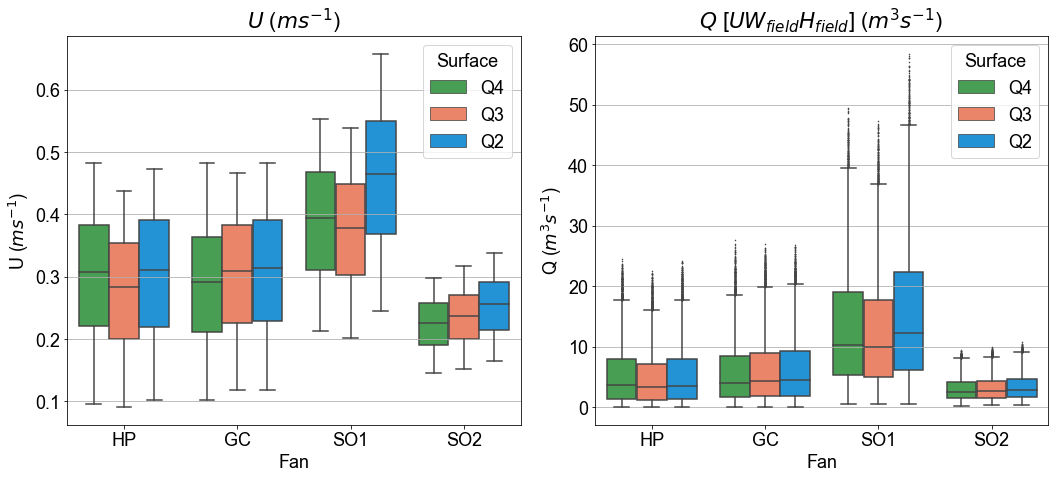

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="U", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0])
ax[0].set_ylabel('U ($ms^{-1}$)')
# ax[0].set_ylim([0,3])
ax[0].set_title(r"$U$ ($ms^{-1}$)")
ax[0].grid(axis='y')

sns.boxplot(x="Fan", y="Q_est", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1])
ax[1].set_ylabel('Q ($m^3s^{-1}$)')
# ax[1].set_ylim([0,3])
ax[1].set_title(r"$Q$ [$U W_{field} H_{field}$] ($m^3s^{-1}$) ")
ax[1].grid(axis='y')
           
plt.tight_layout()
fig.savefig("figures/velocity_water_discharge_estimations.pdf")
plt.show()
plt.close()


In [ ]:
ps = 1680
pf = 1000
g = 9.81
S = 0.08

def bed_shear_stress(pf,g,S,H):
    return pf*g*S*H

H1 = 0.1
tb_1 = bed_shear_stress(pf,g,S,H1)

H2 = 1
tb_2 = bed_shear_stress(pf,g,S,H2)

print(tb_1)
print(tb_2)

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="S", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][0])
ax[0][0].set_ylabel(r"$S_{field}$ ($-$)")
# ax.set_ylim([0,3])
ax[0][0].set_title(r'$S_{field}$ ($-$)')
ax[0][0].grid(axis='y')

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="tc", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][1])
ax[0][1].set_ylabel(r"$\tau*_c$")
# ax.set_ylim([0,3])
ax[0][1].set_title(r"$\tau*_c$"+" (Lamb et al. 2008)")
ax[0][1].grid(axis='y')
ax[0][1].legend_.remove()

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# sns.boxplot(x="Fan", y="tb", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0][2])
# ax[0][2].set_ylabel(r"$\tau_b$ ($Pa$)")
# # ax.set_ylim([0,3])
# ax[0][2].set_title(r'$\tau_b$ (From $D_{50}$ and estimated $t_c$)')
# ax[0][2].grid(axis='y')
# ax[0][2].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="Hbf", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1][0])
ax[1][0].set_ylabel(r"$H_{field}$ ($m$)")
# ax[1][0].set_ylim([0,60])
ax[1][0].set_title(r"$H_{field}$"+" - Uniform 5-95th percentile range from \nQ4 field measurements ($m$)")
ax[1][0].grid(axis='y')
ax[1][0].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="Wbf", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1][1])
ax[1][1].set_ylabel(r"$W_{field}$ ($m$)")
ax[1][1].set_ylim([0,60])
ax[1][1].set_title(r"$W_{field}$"+" - Uniform 5-95th percentile range from \nQ4 field measurements ($m$)")
ax[1][1].grid(axis='y')
ax[1][1].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="tb", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1][2])
ax[1][2].set_ylabel(r"$\tau_b (Pa)$")
# ax.set_ylim([0,3])
ax[1][2].set_title(r"$\tau_b = \rho_fgSH$ ($m$)")
ax[1][2].grid(axis='y')
ax[1][2].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="W_est", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][0])
ax[2][0].set_ylabel(r"$W_{calc} (m)$")
# ax[1][2].set_ylim([0,35])
ax[2][0].set_title(r"$W_{calc} = H_{field}(W/D_{ratio})$ ($m$)")
ax[2][0].grid(axis='y')
ax[2][0].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="ks", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][1])
ax[2][1].set_ylabel(r"$ks$")
ax[2][1].set_title(r"$k = 2D_{90}$")
ax[2][1].grid(axis='y')
ax[2][1].legend_.remove()

surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="W/D", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][2])
ax[2][2].set_ylabel(r"$W/D$")
# ax.set_ylim([0,3])
ax[2][2].set_title(r"$W/D ratio $")
ax[2][2].grid(axis='y')
ax[2][2].legend_.remove()

# surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
# sns.boxplot(x="Fan", y="U", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[2][2])
# ax[2][2].set_ylabel(r"$U$ $(ms^{-1})$")
# ax[2][2].set_title(r"$U = C_f u_* $ ($ms^{-1}$)")

# # ax.set_ylim([0,3])
# ax[2][2].grid(axis='y')
# ax[2][2].legend_.remove()

plt.tight_layout()
fig.savefig("figures/depth_scaled_hydraulic_calcs.pdf")
plt.show()
plt.close()


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
surface_palette = [sns.xkcd_rgb['medium green'], sns.xkcd_rgb['melon'], sns.xkcd_rgb['azure']]
sns.boxplot(x="Fan", y="u*", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[0])
ax[0].set_ylabel(r"$u*$ ($-$)")
# ax.set_ylim([0,3])
ax[0].set_title(r'$u*$')
ax[0].grid(axis='y')

sns.boxplot(x="Fan", y="U", hue="Surface", data=surface_dfs, palette=surface_palette, fliersize=0.7, ax=ax[1])
ax[1].set_ylabel(r"$U$ ($ms^-1$)")
# ax.set_ylim([0,3])
ax[1].set_title(r'$U$ ($ms^-1$)')
ax[1].grid(axis='y')

plt.show()

In [ ]:
ratio_dfs_est1 = pd.DataFrame(columns=['Fan', 'Q_ratio'])

# Field
for idx, fn in enumerate(field_widths):
   
    
    Mod = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q4')]
    mid_H = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q3')]
    late_P = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q2')]

    H_Mod_mid_H = mid_H['Hbf']/Mod['Hbf']
    H_Mod_late_P = late_P['Hbf']/Mod['Hbf']
    
    U_Mod_mid_H = np.power(mid_H['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/mid_H['D90'], 1/6)*np.sqrt((mid_H['Hbf']*mid_H['S'])/(Mod['Hbf']*Mod['S']))
    U_Mod_late_P = np.power(late_P['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/late_P['D90'], 1/6)*np.sqrt((late_P['Hbf']*late_P['S'])/(Mod['Hbf']*Mod['S']))
    
    Q_Mod_mid_H = U_Mod_mid_H*(mid_H['Wbf']/Mod['Wbf'])*(mid_H['Hbf']/Mod['Hbf'])
    Q_Mod_late_P = U_Mod_late_P*(late_P['Wbf']/Mod['Wbf'])*(late_P['Hbf']/Mod['Hbf'])
    
    r_df = pd.DataFrame({'H_ratio': H_Mod_mid_H, 'Q_ratio': Q_Mod_mid_H, 'U_ratio': U_Mod_mid_H, 'ratio_type':'Ho/Mo (Q3/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est1 = ratio_dfs_est1.append(r_df)
 
    r_df = pd.DataFrame({'H_ratio': H_Mod_late_P, 'Q_ratio': Q_Mod_late_P, 'U_ratio': U_Mod_late_P, 'ratio_type':'Pl/Mo (Q2/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est1 = ratio_dfs_est1.append(r_df)
    
ratio_dfs_est2 = pd.DataFrame(columns=['Fan', 'Q_ratio'])

# Width/Depth Ratio

for idx, fn in enumerate(field_widths):

    Mod = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q4')]
    mid_H = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q3')]
    late_P = surface_dfs[(surface_dfs['Fan'] == fn) & (surface_dfs['Surface'] == 'Q2')]

    H_Mod_mid_H = mid_H['Hbf']/Mod['Hbf']
    H_Mod_late_P = late_P['Hbf']/Mod['Hbf']
    
    U_Mod_mid_H = np.power(mid_H['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/mid_H['D90'], 1/6)*np.sqrt((mid_H['Hbf']*mid_H['S'])/(Mod['Hbf']*Mod['S']))
    U_Mod_late_P = np.power(mid_H['Hbf']/Mod['Hbf'], 1/6)*np.power(Mod['D90']/late_P['D90'], 1/6)*np.sqrt((late_P['Hbf']*late_P['S'])/(Mod['Hbf']*Mod['S']))
    
    Q_Mod_mid_H = U_Mod_mid_H*(mid_H['W_est']/Mod['W_est'])*(mid_H['Hbf']/Mod['Hbf'])
    Q_Mod_late_P = U_Mod_late_P*(late_P['W_est']/Mod['W_est'])*(late_P['Hbf']/Mod['Hbf'])
    
    r_df = pd.DataFrame({'H_ratio': H_Mod_mid_H, 'Q_ratio': U_Mod_mid_H, 'U_ratio': U_Mod_mid_H, 'ratio_type':'Ho/Mo (Q3/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est2 = ratio_dfs_est2.append(r_df)
 
    r_df = pd.DataFrame({'H_ratio': H_Mod_late_P, 'Q_ratio': U_Mod_late_P, 'U_ratio': U_Mod_late_P, 'ratio_type':'Pl/Mo (Q2/Q4)'})
    r_df['Fan'] = fn
    ratio_dfs_est2 = ratio_dfs_est2.append(r_df)

    
print(ratio_dfs_est1)
ratio_dfs_est1.to_csv('ratio_data/depth_scaled_ratio_dfs_est1.csv')


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

surface_palette = [sns.xkcd_rgb['pastel purple'], sns.xkcd_rgb['silver']]
sns.boxplot(x="Fan", y="U_ratio", hue="ratio_type", data=ratio_dfs_est1, 
            palette=surface_palette, fliersize=0.7, ax=ax, showfliers=False)
ax.set_ylabel('$U_1/U_2$')
ax.set_title('$U_1/U_2$')
ax.grid(axis='y')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

surface_palette = [sns.xkcd_rgb['pastel purple'], sns.xkcd_rgb['silver']]
sns.boxplot(x="Fan", y="Q_ratio", hue="ratio_type", data=ratio_dfs_est1, 
            palette=surface_palette, fliersize=0.7, ax=ax[0], showfliers=False)
ax[0].set_ylabel('$Q_1/Q_2$')
ax[0].set_ylim([0,11])
ax[0].set_title('$Q_1/Q_2$ ($W_{field}$)')
ax[0].grid(axis='y')

sns.boxplot(x="Fan", y="Q_ratio", hue="ratio_type", data=ratio_dfs_est2, 
            palette=surface_palette, fliersize=0.7, ax=ax[1], showfliers=False)
ax[1].set_ylabel('$Q_1/Q_2$')
ax[1].set_ylim([0,11])
ax[1].set_title('$Q_1/Q_2$ ($W_{calc}$)')
ax[1].grid(axis='y')

plt.tight_layout()
fig.savefig("figures/depth_scaled_velocity_discharge_ratios.pdf")
plt.show()
plt.close()


In [ ]:

ylims_H_ratio = {
    'HP':(0.4,2.5),
    'GC':(0.4,2),
    'SO1':(0.4,2),
    'SO2':(0.4,2)
}

ylims_Q_ratio = {
    'HP':(0,11),
    'GC':(0,7),
    'SO1':(0,7),
    'SO2':(0,7)
}

ylims_U_ratio = {
    'HP':(0.6,1.5),
    'GC':(0.6,1.5),
    'SO1':(0.6,1.5),
    'SO2':(0.6,1.5)
}

for f in fans:
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,7))
    ratio_dfs_est1_fan = ratio_dfs_est1[ratio_dfs_est1['Fan'] == f]
    ratio_dfs_est2_fan = ratio_dfs_est2[ratio_dfs_est2['Fan'] == f]
    
    surface_palette = [sns.xkcd_rgb['pastel purple'], sns.xkcd_rgb['silver']]
    sns.boxplot(x="Fan", y="H_ratio", hue="ratio_type", data=ratio_dfs_est1_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[0], showfliers=False)
    ax[0].set_ylabel('$H_1/H_2$')
    ax[0].set_title('$H_1/H_2$')
    ax[0].grid(axis='y')
#     ax[0].set_ylim(ylims_H_ratio[f])
    ax[0].legend_.remove()
    
    
    sns.boxplot(x="Fan", y="U_ratio", hue="ratio_type", data=ratio_dfs_est1_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[1], showfliers=False)
    ax[1].set_ylabel('$U_1/U_2$')
    ax[1].set_title('$U_1/U_2$')
    ax[1].grid(axis='y')
#     ax[1].set_ylim(ylims_U_ratio[f])
    ax[1].legend_.remove()
    
    sns.boxplot(x="Fan", y="Q_ratio", hue="ratio_type", data=ratio_dfs_est1_fan, 
                palette=surface_palette, fliersize=0.7, ax=ax[2], showfliers=False)
    ax[2].set_ylabel('$Q_1/Q_2$')
#     ax[2].set_ylim(ylims_Q_ratio[f])
    ax[2].set_title('$Q_1/Q_2$ ($W_{field}$)')
    ax[2].grid(axis='y')
    
    plt.tight_layout()
    ax[2].legend_.remove()

    fig.savefig("figures/depth_scaled_velocity_discharge_ratios_"+f+".pdf")
    plt.show()
    plt.close()
